In [49]:

from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [50]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSet_Assignment.txt')

df.to_csv('stockData.csv',index=None)

In [51]:
df1=df.reset_index()['Close']

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 0.33499999999999996
DEBUG:mat

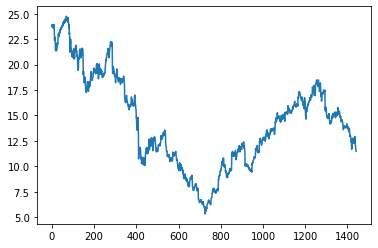

In [52]:

import matplotlib.pyplot as plt
plt.plot(df1)

In [53]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [54]:
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [55]:


training_size,test_size

(1081, 361)

In [56]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]  
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [57]:
time_step = 30
X_train, y_train1 = create_dataset(train_data, time_step)
X_test, y_test1 = create_dataset(test_data, time_step)

In [58]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [59]:
X_train.shape


(1050, 30, 1)

In [79]:
model = Sequential([
                    LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)),
                    Dropout(0.2),
                    LSTM(units = 50, return_sequences = True),
                    Dropout(0.2),
                    LSTM(units = 50, return_sequences = True),
                    Dropout(0.2),
                    LSTM(units = 50),
                    Dropout(0.2),
                    Dense(units = 1)])

model.compile(optimizer = 'adam', loss = 'mean_absolute_error')

In [94]:
model.fit(X_train,y_train1,validation_data=(X_test,y_test1),epochs=30,batch_size=32,verbose=1)


Epoch 1/30
33/33 [==============================] - 2s 63ms/step - loss: 0.0320 - val_loss: 0.0161
Epoch 2/30
33/33 [==============================] - 2s 64ms/step - loss: 0.0305 - val_loss: 0.0149
Epoch 3/30
33/33 [==============================] - 2s 62ms/step - loss: 0.0299 - val_loss: 0.0147
Epoch 4/30
33/33 [==============================] - 2s 62ms/step - loss: 0.0303 - val_loss: 0.0195
Epoch 5/30
33/33 [==============================] - 2s 62ms/step - loss: 0.0305 - val_loss: 0.0142
Epoch 6/30
33/33 [==============================] - 2s 61ms/step - loss: 0.0284 - val_loss: 0.0149
Epoch 7/30
33/33 [==============================] - 2s 62ms/step - loss: 0.0304 - val_loss: 0.0147
Epoch 8/30
33/33 [==============================] - 2s 62ms/step - loss: 0.0288 - val_loss: 0.0256
Epoch 9/30
33/33 [==============================] - 2s 61ms/step - loss: 0.0307 - val_loss: 0.0138
Epoch 10/30
33/33 [==============================] - 2s 62ms/step - loss: 0.0291 - val_loss: 0.0173
Epoch 11/

In [95]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [96]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [97]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train1,train_predict))

14.648656531440247

In [98]:
math.sqrt(mean_squared_error(y_test1,test_predict))

15.630631373888317

In [99]:

x_input=test_data[331:].reshape(1,-1)
x_input.shape

(1, 30)

In [100]:


temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [101]:
from numpy import array

lst_output=[]
n_steps=30
i=0
while(i<3):
    
    if(len(temp_input)>30):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.341608]
31
1 day input [0.39710346 0.39476757 0.3896286  0.37444519 0.3653352  0.36813824
 0.3478159  0.32655922 0.3594954  0.37561316 0.38121933 0.3819201
 0.37608035 0.38051856 0.38355522 0.35692594 0.37094138 0.36323289
 0.364868   0.36066337 0.35809391 0.35972903 0.39149729 0.37047418
 0.34641436 0.34407847 0.32562482 0.32188739 0.31651484 0.34160799]
1 day output [[0.34310177]]
2 day input [0.39476757 0.3896286  0.37444519 0.3653352  0.36813824 0.3478159
 0.32655922 0.3594954  0.37561316 0.38121933 0.3819201  0.37608035
 0.38051856 0.38355522 0.35692594 0.37094138 0.36323289 0.364868
 0.36066337 0.35809391 0.35972903 0.39149729 0.37047418 0.34641436
 0.34407847 0.32562482 0.32188739 0.31651484 0.34160799 0.34310177]
2 day output [[0.35155267]]
[[0.3416079878807068], [0.34310176968574524], [0.35155266523361206]]


In [102]:

nout=scaler.inverse_transform(lst_output)
print("Predicted Stock for nex three days are:")
for i in range(len(nout)):
    print(nout[i])

Predicted Stock for nex three days are:
[11.95923634]
[11.98827758]
[12.15257496]


In [103]:


xnew=np.arange(1,31)
xpred=np.arange(31,34)

In [104]:
len(df1)

1442

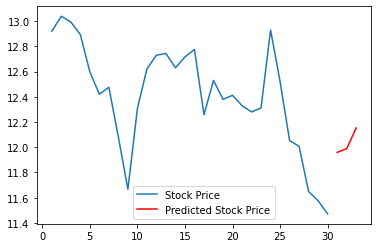

In [105]:

plt.plot(xnew,scaler.inverse_transform(df1[1412:]),label = 'Stock Price')
plt.plot(xpred,scaler.inverse_transform(lst_output),color = 'red', label = 'Predicted Stock Price')
plt.legend()


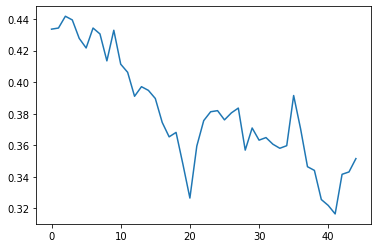

In [106]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1400:])

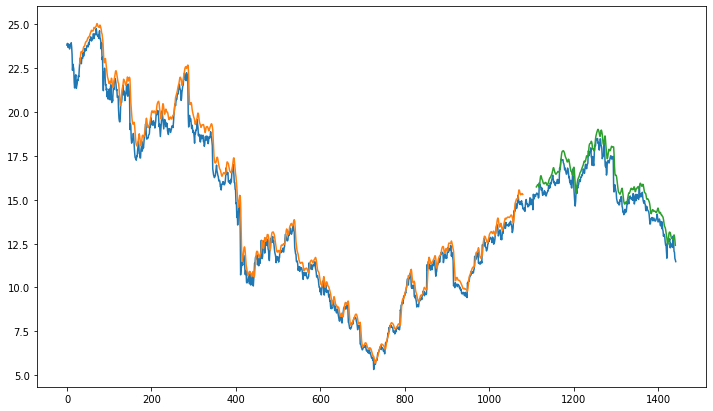

In [108]:
plt.figure(figsize=(12,7))
look_back=30
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

BOHB Hyperparameter Tuning

In [13]:
!pip install hpbandster


     |████████████████████████████████| 61kB 3.0MB/s 
     |████████████████████████████████| 92kB 4.4MB/s 
     |████████████████████████████████| 972kB 30.2MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for ConfigSpace: filename=ConfigSpace-0.4.16-cp36-cp36m-linux_x86_64.whl size=2881464 sha256=0489936ece3cb85cef97794b3459633a604a638353817ebb44e3eaeb1b60d11e
  Stored in directory: /root/.cache/pip/wheels/4f/13/2f/a0ae8e1081410d394133980a2ccd1c5524ed4f0c83ba9a61a7
Successfully built ConfigSpace
  Created wheel for hpbandster: filename=hpbandster-0.7.4-cp36-none-any.whl size=80007 sha256=65f0f15f88ae6e8f8023797c9d6cb4a685e7c5491ba66e03d513748966ef43d6
  Stored in directory: /root/.cache/pip/wheels/9d/57/62/6b00c8011bac96e0c404adc5be4e16964ba4544614240b4e23
Successfully built hpbandster


In [109]:

import ConfigSpace as CS
import ConfigSpace.hyperparameters as CSH
import hpbandster.core.nameserver as hpns
from hpbandster.core.worker import Worker
from hpbandster.optimizers import BOHB
import keras
import logging
import time
logging.basicConfig(level=logging.DEBUG)


In [113]:
class KerasWorker(Worker):
    def __init__(self,*args,sleep_interval=0, N_train=900, N_valid=281, **kwargs):
            super().__init__(**kwargs)

            self.batch_size = 64

           

           
            (x_train, y_train), (x_test, y_test) = (X_train, y_train1),(X_test, y_test1)
            


            self.x_train, self.y_train = x_train[:N_train], y_train[:N_train]
            self.x_validation, self.y_validation = x_train[-N_valid:], y_train[-N_valid:]
            self.x_test, self.y_test   = x_test, y_test
            self.sleep_interval =  sleep_interval
    def compute(self, config, budget, working_directory,**kwargs):
          
            model = Sequential([
                    LSTM(config['num_filters_1'], return_sequences = True, input_shape = (X_train.shape[1], 1)),
                    Dropout(config['dropout_rate1']),
                    LSTM(config['num_filters_2'], return_sequences = True),
                    Dropout(config['dropout_rate2']),
                    LSTM(config['num_filters_3'], return_sequences = True),
                    Dropout(config['dropout_rate3']),
                    LSTM(config['num_filters_4']),
                    Dropout(config['dropout_rate4']),
                    Dense(units = 1)])
            if config['optimizer'] == 'Adam':
                    optimizer = keras.optimizers.Adam(lr=config['lr'])
            

            model.compile(optimizer = 'adam', loss = 'mean_absolute_error',metrics=['accuracy'])
           

           

            model.fit(self.x_train, self.y_train,
                              batch_size=self.batch_size,
                              epochs=int(budget),
                              verbose=0,
                              validation_data=(self.x_test, self.y_test))

            train_score = model.evaluate(self.x_train, self.y_train, verbose=0)
            val_score = model.evaluate(self.x_validation, self.y_validation, verbose=0)
            test_score = model.evaluate(self.x_test, self.y_test, verbose=0)
            time.sleep(self.sleep_interval)

            return ({
                    'loss': 1-val_score[1], 
                    'info': {       'test accuracy': test_score[1],
                                            'train accuracy': train_score[1],
                                            'validation accuracy': val_score[1],
                                            'number of parameters': model.count_params(),
                                    }

            })
    @staticmethod
    def get_configspace():
       
            cs = CS.ConfigurationSpace()

            lr = CSH.UniformFloatHyperparameter('lr', lower=1e-6, upper=1e-1, default_value='1e-2', log=True)

           
            optimizer = CSH.CategoricalHyperparameter('optimizer', ['Adam'])


            cs.add_hyperparameters([lr, optimizer])



            num_filters_1 = CSH.UniformIntegerHyperparameter('num_filters_1', lower=4, upper=64, default_value=16, log=True)
            num_filters_2 = CSH.UniformIntegerHyperparameter('num_filters_2', lower=4, upper=64, default_value=16, log=True)
            num_filters_3 = CSH.UniformIntegerHyperparameter('num_filters_3', lower=4, upper=64, default_value=16, log=True)
            num_filters_4 = CSH.UniformIntegerHyperparameter('num_filters_4', lower=4, upper=64, default_value=16, log=True)
            cs.add_hyperparameters([num_filters_1, num_filters_2, num_filters_3,num_filters_4])


            dropout_rate1 = CSH.UniformFloatHyperparameter('dropout_rate1', lower=0.0, upper=0.9, default_value=0.5, log=False)
            dropout_rate2 = CSH.UniformFloatHyperparameter('dropout_rate2', lower=0.0, upper=0.9, default_value=0.5, log=False)
            dropout_rate3 = CSH.UniformFloatHyperparameter('dropout_rate3', lower=0.0, upper=0.9, default_value=0.5, log=False)
            dropout_rate4 = CSH.UniformFloatHyperparameter('dropout_rate4', lower=0.0, upper=0.9, default_value=0.5, log=False)
            cs.add_hyperparameters([dropout_rate1,dropout_rate2,dropout_rate3,dropout_rate4])


        

            return cs



In [114]:
NS = hpns.NameServer(run_id='example1', host='127.0.0.1', port=None)
NS.start()

('127.0.0.1', 9090)

In [115]:


w = KerasWorker(sleep_interval = 0, nameserver='127.0.0.1',run_id='example1')
w.run(background=True)

DEBUG:hpbandster.run_example1.worker.0787206c3a8a.56:WORKER: Connected to nameserver <Pyro4.core.Proxy at 0x7f96d1fcf240; connected IPv4; for PYRO:Pyro.NameServer@127.0.0.1:9090>
DEBUG:hpbandster.run_example1.worker.0787206c3a8a.56:WORKER: No dispatcher found. Waiting for one to initiate contact.
INFO:hpbandster.run_example1.worker.0787206c3a8a.56:WORKER: start listening for jobs


In [116]:
bohb = BOHB(  configspace = w.get_configspace(),
              run_id = 'example1', nameserver='127.0.0.1',
              min_budget=10, max_budget=100
           )
res = bohb.run(n_iterations=10)

DEBUG:hpbandster:wait_for_workers trying to get the condition
INFO:hpbandster:DISPATCHER: started the 'discover_worker' thread
INFO:hpbandster:DISPATCHER: started the 'job_runner' thread
INFO:hpbandster:DISPATCHER: Pyro daemon running on localhost:36279
DEBUG:hpbandster:DISPATCHER: Starting worker discovery
DEBUG:hpbandster:DISPATCHER: Found 1 potential workers, 0 currently in the pool.
INFO:hpbandster:DISPATCHER: discovered new worker, hpbandster.run_example1.worker.0787206c3a8a.56140288902707072
DEBUG:hpbandster:HBMASTER: number of workers changed to 1
DEBUG:hpbandster:Enough workers to start this run!
INFO:hpbandster:HBMASTER: starting run at 1606994406.2027133
DEBUG:hpbandster:adjust_queue_size: lock accquired
DEBUG:hpbandster:DISPATCHER: jobs to submit = 0, number of idle workers = 1 -> waiting!
INFO:hpbandster:HBMASTER: adjusted queue size to (0, 1)
DEBUG:hpbandster:DISPATCHER: Finished worker discovery
DEBUG:hpbandster:start sampling a new configuration.
DEBUG:hpbandster:DISPATC

In [117]:
bohb.shutdown(shutdown_workers=True)
NS.shutdown()

DEBUG:hpbandster:HBMASTER: shutdown initiated, shutdown_workers = True
DEBUG:hpbandster.run_example1.worker.0787206c3a8a.56:WORKER: shutting down now!
INFO:hpbandster:DISPATCHER: Dispatcher shutting down
DEBUG:hpbandster:DISPATCHER: Trying to submit another job.
DEBUG:hpbandster:DISPATCHER: job_runner shutting down
DEBUG:hpbandster:DISPATCHER: discover_workers shutting down
DEBUG:hpbandster:DISPATCHER: 'discover_worker' thread exited
DEBUG:hpbandster:DISPATCHER: 'job_runner' thread exited
INFO:hpbandster:DISPATCHER: shut down complete


In [118]:
id2config = res.get_id2config_mapping()
incumbent = res.get_incumbent_id()

print('Best found configuration:', id2config[incumbent]['config'])
print('A total of %i unique configurations where sampled.' % len(id2config.keys()))
print('A total of %i runs where executed.' % len(res.get_all_runs()))
print('Total budget corresponds to %.1f full function evaluations.'%(sum([r.budget for r in res.get_all_runs()])/100))

Best found configuration: {'dropout_rate1': 0.06779980212410576, 'dropout_rate2': 0.3489704255658628, 'dropout_rate3': 0.5100839556105712, 'dropout_rate4': 0.4820494433817154, 'lr': 2.2301790301911857e-06, 'num_filters_1': 8, 'num_filters_2': 33, 'num_filters_3': 10, 'num_filters_4': 7, 'optimizer': 'Adam'}
A total of 54 unique configurations where sampled.
A total of 73 runs where executed.
Total budget corresponds to 27.0 full function evaluations.
